In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('cell_samples.csv')

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df= df.drop(columns = 'ID' , axis=0)

In [5]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        699 non-null    int64 
 1   UnifSize     699 non-null    int64 
 2   UnifShape    699 non-null    int64 
 3   MargAdh      699 non-null    int64 
 4   SingEpiSize  699 non-null    int64 
 5   BareNuc      699 non-null    object
 6   BlandChrom   699 non-null    int64 
 7   NormNucl     699 non-null    int64 
 8   Mit          699 non-null    int64 
 9   Class        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [7]:
df['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [8]:
df['BareNuc']= pd.to_numeric(df['BareNuc'], errors='coerce')

In [9]:
df=df.dropna()

In [10]:
df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
from scipy.stats import skew

In [12]:
sk=skew(df[['Clump','UnifSize','UnifShape','MargAdh' ,'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit','Class']])

In [13]:
print(sk)

[0.58636285 1.22370903 1.15534551 1.50586459 1.69997243 0.98784006
 1.09286357 1.41730968 3.50375965 0.62930825]


In [14]:
df[['UnifSize','UnifShape','MargAdh' ,'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]=np.log1p(df[['UnifSize','UnifShape','MargAdh' ,'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']])

In [15]:
print(skew(df[['UnifSize','UnifShape','MargAdh' ,'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]))

[0.77648381 0.67479977 1.00272807 0.98777454 0.75640126 0.37686531
 1.0604954  2.65027116]


In [16]:
from scipy.stats import boxcox

In [24]:
df['UnifSize'],ftt = boxcox(df['UnifSize']+1)

In [34]:
print(skew(df['UnifSize']))

0.3824745315382161


In [36]:
colums=['UnifSize','UnifShape','MargAdh' ,'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']

In [39]:
for col in colums:
    df[col],_ = boxcox(df[col])

In [41]:
print(skew(df[['UnifSize','UnifShape','MargAdh' ,'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]))

[ 2.71807330e-01  2.48088763e-01  4.45509118e-01  8.28738222e-05
  4.62707331e-01 -3.67395975e-02  6.26343509e-01  1.70589990e+00]


<Axes: >

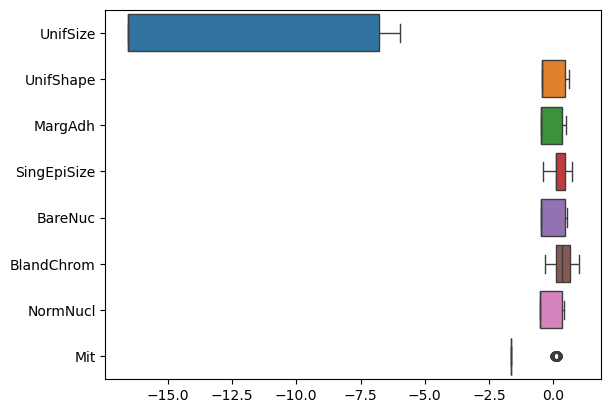

In [43]:
sns.boxplot(df[['UnifSize','UnifShape','MargAdh' ,'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']],orient='h')

In [44]:
columns = ['UnifSize','UnifShape','MargAdh' ,'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit','Class']

In [47]:
condition= pd.Series(False , index=df.index)
for col in columns:
    Q1 = np.percentile(df[col] ,25)
    Q3 = np.percentile(df[col] , 75)
    IQR = Q3-Q1
    lower_band = Q1 - 1.5*IQR
    upper_band = Q3 + 1.5*IQR
    outlier= (df[col]< lower_band) | (df[col]> upper_band)
    condition|= outlier

In [49]:
df[condition]

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
8,2,-16.537785,-0.429554,-0.489235,0.092273,-0.472292,-0.348701,-0.533510,0.143294,2
14,8,-6.308966,0.460544,0.485986,0.633208,0.503950,0.632406,0.349612,0.140377,4
18,10,-6.308966,0.546057,0.420272,0.432684,0.516975,0.508322,-0.533510,0.069333,4
20,7,-7.998070,0.090411,0.485986,0.519220,0.516975,0.632406,0.311024,0.140377,4
32,10,-6.308966,0.546057,0.257966,0.673667,0.405737,0.810738,0.311024,0.130401,4
...,...,...,...,...,...,...,...,...,...,...
680,10,-5.952960,0.618414,0.485986,0.519220,0.516975,0.988346,0.421677,0.145012,4
681,5,-5.952960,0.618414,0.485986,0.432684,0.516975,0.632406,0.374292,0.130401,4
689,1,-16.537785,-0.429554,-0.489235,0.092273,-0.472292,-0.348701,-0.533510,0.145317,2
693,3,-16.537785,-0.429554,-0.489235,0.092273,-0.472292,0.095271,-0.533510,0.069333,2


In [65]:
for col in columns:
    Q1 = np.percentile(df[col] ,25)
    Q3 = np.percentile(df[col] , 75)
    IQR = Q3-Q1
    lower_band = Q1 - 1.5*IQR
    upper_band = Q3 + 1.5*IQR
    median= df[col].median()
    df.loc[df[col]< lower_band ,col]=median
    df.loc[df[col]< lower_band ,col]=median

In [67]:
df=df.astype(int)

In [69]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,-16,0,0,0,0,0,0,-1,2
1,5,-7,0,0,0,0,0,0,-1,2
2,3,-16,0,0,0,0,0,0,-1,2
3,6,-6,0,0,0,0,0,0,-1,2
4,4,-16,0,0,0,0,0,0,-1,2


In [79]:
df=df.drop(['MargAdh','UnifShape','SingEpiSize','BareNuc','BlandChrom','NormNucl'] , axis=1)

In [81]:
df.head()

,Clump,UnifSize,Mit,Class
0,5,-16,-1,2
1,5,-7,-1,2
2,3,-16,-1,2
3,6,-6,-1,2
4,4,-16,-1,2


In [83]:
x=df[['Clump', 'UnifSize', 'Mit']].values

In [85]:
y=df['Class'].values

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
x_train , x_test , y_train , y_test = train_test_split(x, y ,test_size=0.2 , random_state=42)

In [91]:
from sklearn.svm import SVC

In [93]:
SV = SVC(C=10 , kernel='rbf' ,gamma=0.001)
SV.fit(x_train , y_train)

SVC(C=10, gamma=0.001)

In [95]:
y_pred = SV.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score

In [99]:
print('Accuracy:' , accuracy_score(y_test , y_pred))

Accuracy: 0.9343065693430657


In [101]:
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'True Label')

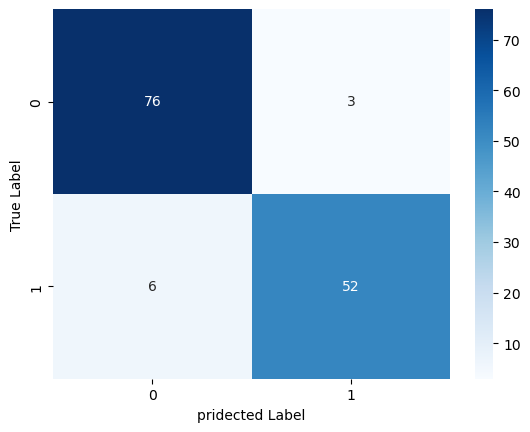

In [111]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot=True , cmap='Blues')
plt.xlabel('pridected Label')
plt.ylabel('True Label')

In [113]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.93      0.96      0.94        79
           4       0.95      0.90      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137



In [117]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = {'C':[0.01,0.1,1,10,100], 'gamma':[0.001,0.001,0.1,1,10]}
svm_model=SVC(kernel='rbf' ,class_weight='balanced')
grid=GridSearchCV(svm_model , param_grid=param_grid , cv=5, scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.001, 0.1, 1, 10]},
             scoring='accuracy')

In [133]:
best_svm=grid.best_estimator_

In [135]:
y_pred_best = best_svm.predict(x_test)

In [137]:
print(classification_report(y_test, y_pred_best))
print('Accuracy:' , accuracy_score(y_test , y_pred_best))

              precision    recall  f1-score   support

           2       0.91      0.95      0.93        79
           4       0.93      0.88      0.90        58

    accuracy                           0.92       137
   macro avg       0.92      0.91      0.92       137
weighted avg       0.92      0.92      0.92       137

Accuracy: 0.9197080291970803


Text(50.722222222222214, 0.5, 'True Label')

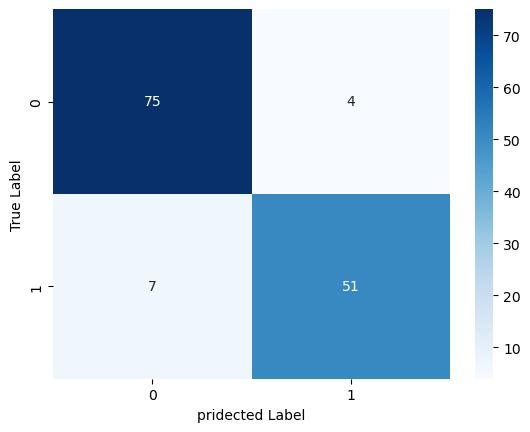

In [139]:
cm=confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm , annot=True , cmap='Blues')
plt.xlabel('pridected Label')
plt.ylabel('True Label')

In [142]:
from sklearn.feature_selection import RFE

In [148]:
svm_rfe = SVC(kernel='linear')

In [152]:
rfe = RFE(estimator=svm_rfe , n_features_to_select=2)
rfe.fit(x_train , y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=2)

In [162]:
rfe.support_

array([False,  True,  True])

In [164]:
features= ['Clump', 'UnifSize', 'Mit']

In [168]:
selected_feature = [features[i]  for i in range(len(features))   if rfe.support_[i]]
print(selected_feature)

['UnifSize', 'Mit']
